In [332]:
import numpy as np
import pandas as pd
import seaborn as sns

In [333]:
sales = pd.read_csv('sales.csv')
sales

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
205,196,38.2,3.7,13.8,7.6
206,197,94.2,4.9,8.1,9.7
207,198,177.0,9.3,6.4,12.8
208,199,NaN,42.0,66.2,25.5


In [334]:
sales = pd.DataFrame(sales)

In [335]:
sales.describe()

,id,TV,radio,newspaper,sales
count,210.000000,2.070000e+02,210.000000,210.000000,210.000000
mean,100.809524,1.449275e+10,23.200476,30.294762,13.959048
std,57.399481,1.198000e+11,14.827575,21.726517,5.196055
min,1.000000,7.000000e-01,0.000000,0.300000,1.600000
25%,52.250000,7.405000e+01,10.025000,12.025000,10.400000
50%,101.500000,1.498000e+02,22.400000,25.750000,12.900000
75%,149.750000,2.200500e+02,36.575000,44.900000,17.300000
max,200.000000,1.000000e+12,49.600000,114.000000,27.000000


# Step 1
## First point

In [336]:
for sale in sales:
    q1 = sales[sale].quantile(.25)
    q3 = sales[sale].quantile(.75)
    iqr = q3-q1
    fence_low = q1 - 1.5*iqr
    fence_high = q3 + 1.5 * iqr
    sales = sales.loc[(sales[sale] > fence_low) & (sales[sale] < fence_high)]

In [337]:
rows, column = sales.shape
new_id = [number for number in range(1,rows+1)]
sales['id'] = new_id
sales

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
204,198,149.7,35.6,6.0,17.3
205,199,38.2,3.7,13.8,7.6
206,200,94.2,4.9,8.1,9.7
207,201,177.0,9.3,6.4,12.8


## Second point

In [338]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total sales')

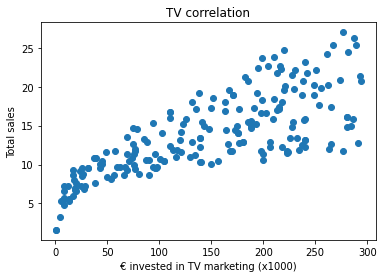

In [339]:
plt.scatter(sales['TV'], sales['sales'])
plt.title('TV correlation')
plt.xlabel('€ invested in TV marketing (x1000)')
plt.ylabel('Total sales')

Text(0, 0.5, 'Total sales')

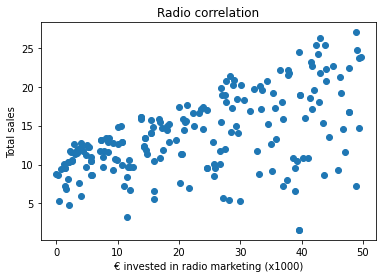

In [340]:
plt.scatter(sales['radio'], sales['sales'])
plt.title('Radio correlation')
plt.xlabel('€ invested in radio marketing (x1000)')
plt.ylabel('Total sales')

Text(0, 0.5, 'Total sales')

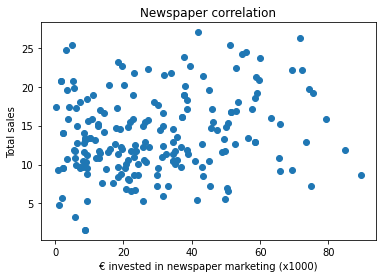

In [341]:
plt.scatter(sales['newspaper'], sales['sales'])
plt.title('Newspaper correlation')
plt.xlabel('€ invested in newspaper marketing (x1000)')
plt.ylabel('Total sales')

# Step 2
## First point

In [342]:
column1 = []
for index, row in sales.iterrows():
    inv_per_sale = (row['TV'] + row['radio'] + row['newspaper']) / row['sales']
    column1.append(inv_per_sale)
sales['Total investment/sale'] = column1
sales

,id,TV,radio,newspaper,sales,Total investment/sale
0,1,230.1,37.8,69.2,22.1,15.253394
1,2,44.5,39.3,45.1,10.4,12.394231
2,3,17.2,45.9,69.3,9.3,14.236559
3,4,151.5,41.3,58.5,18.5,13.583784
4,5,180.8,10.8,58.4,12.9,19.379845
...,...,...,...,...,...,...
204,198,149.7,35.6,6.0,17.3,11.057803
205,199,38.2,3.7,13.8,7.6,7.328947
206,200,94.2,4.9,8.1,9.7,11.051546
207,201,177.0,9.3,6.4,12.8,15.054688


## Second point

In [343]:
column2 = []
for index, row in sales.iterrows():
    if row['Total investment/sale'] < 20 and row['sales'] > 15.0:
        column2.append(True)
    else:
        column2.append(False)
sales['Successful campaign'] = column2
sales

,id,TV,radio,newspaper,sales,Total investment/sale,Successful campaign
0,1,230.1,37.8,69.2,22.1,15.253394,True
1,2,44.5,39.3,45.1,10.4,12.394231,False
2,3,17.2,45.9,69.3,9.3,14.236559,False
3,4,151.5,41.3,58.5,18.5,13.583784,True
4,5,180.8,10.8,58.4,12.9,19.379845,False
...,...,...,...,...,...,...,...
204,198,149.7,35.6,6.0,17.3,11.057803,True
205,199,38.2,3.7,13.8,7.6,7.328947,False
206,200,94.2,4.9,8.1,9.7,11.051546,False
207,201,177.0,9.3,6.4,12.8,15.054688,False


## Question: How many campaigns were successful?

In [344]:
counter = 0
for value in sales['Successful campaign']:
    if value == True:
        counter += 1
print(f'{counter} campaings were successful')

71 campaings were successful


# Step 3
## First point

In [345]:
X_sales = sales.drop('Successful campaign', axis=1)
X_sales

,id,TV,radio,newspaper,sales,Total investment/sale
0,1,230.1,37.8,69.2,22.1,15.253394
1,2,44.5,39.3,45.1,10.4,12.394231
2,3,17.2,45.9,69.3,9.3,14.236559
3,4,151.5,41.3,58.5,18.5,13.583784
4,5,180.8,10.8,58.4,12.9,19.379845
...,...,...,...,...,...,...
204,198,149.7,35.6,6.0,17.3,11.057803
205,199,38.2,3.7,13.8,7.6,7.328947
206,200,94.2,4.9,8.1,9.7,11.051546
207,201,177.0,9.3,6.4,12.8,15.054688


In [346]:
Xtrain = X_sales.iloc[:160]
Xtrain = Xtrain.drop('id', axis=1)
Xtrain

,TV,radio,newspaper,sales,Total investment/sale
0,230.1,37.8,69.2,22.1,15.253394
1,44.5,39.3,45.1,10.4,12.394231
2,17.2,45.9,69.3,9.3,14.236559
3,151.5,41.3,58.5,18.5,13.583784
4,180.8,10.8,58.4,12.9,19.379845
...,...,...,...,...,...
162,171.3,39.7,37.7,19.0,13.089474
163,171.3,39.7,37.7,19.0,13.089474
164,187.8,21.1,9.5,15.6,14.000000
165,4.1,11.6,5.7,3.2,6.687500


In [347]:
y_sales = sales['Successful campaign']
y_sales

0       True
1      False
2      False
3       True
4      False
       ...  
204     True
205    False
206    False
207    False
209    False
Name: Successful campaign, Length: 202, dtype: bool

In [372]:
ytrain = y_sales.iloc[:160]
ytrain

0       True
1      False
2      False
3       True
4      False
       ...  
162     True
163     True
164     True
165    False
166     True
Name: Successful campaign, Length: 160, dtype: bool

## Second point

In [349]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)

GaussianNB()

## Third point

# Step 4
## First point

In [350]:
Xtest = X_sales.iloc[160:]
Xtest = Xtest.drop('id', axis=1)
Xtest

,TV,radio,newspaper,sales,Total investment/sale
167,149.8,1.3,24.3,10.1,17.366337
168,11.7,36.9,45.2,7.3,12.849315
169,131.7,18.4,34.6,12.9,14.317829
170,172.5,18.1,30.7,14.4,15.368056
171,85.7,35.8,49.3,13.3,12.842105
172,188.4,18.1,25.6,14.9,15.577181
173,163.5,36.8,7.4,18.0,11.538889
174,117.2,14.7,5.4,11.9,11.537815
175,234.5,3.4,84.8,11.9,27.117647
176,17.9,37.6,21.6,8.0,9.637500


In [380]:
ytest = y_sales.iloc[160:]
ytest

167    False
168    False
169    False
170    False
171    False
172    False
173     True
174    False
175    False
176    False
177    False
178     True
179    False
180    False
181    False
182    False
183    False
184    False
185     True
186     True
187    False
188    False
189    False
190    False
191    False
192    False
193     True
194     True
195     True
196    False
197     True
198     True
199    False
200    False
201    False
202    False
203     True
204     True
205    False
206    False
207    False
209    False
Name: Successful campaign, dtype: bool

## Second point

In [352]:
y_model = model.predict(Xtest) 

In [353]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_model) * 100
print(f'The {round(accuracy, 2)}% of the test set was correctly classified')

The 97.62% of the test set was correctly classified


In [381]:
count_fpositives = 0
count_fnegatives = 0
ytest = ytest.to_numpy()
for index in range(0, len(ytest)):
    if ytest[index] == True and y_model[index] == False:
        count_fnegatives += 1
    if ytest[index] == False and y_model[index] == True:
        count_fpositives += 1

print(f'The proportion of False positives is: {count_fpositives/len(ytest)}')
print(f'The proportion of False negatives is: {round(count_fnegatives/len(ytest), 2)}')

The proportion of False positives is: 0.0
The proportion of False negatives is: 0.02


In [328]:
y_model

array([False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False])

In [379]:
ytest

array([False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True, False, False, False, False])